# EDA - Exploratory data analysis
It is the process of examining datasets to summarize their main characteristics, often using visual methods. It helps in understanding the data's structure, detecting patterns, and identifying anomalies before applying more complex modeling techniques.

## About Dataset
https://www.kaggle.com/datasets/krishujeniya/fastag-frauds-records

The dataset comprises transaction records from the Fastag electronic toll collection system in India. It includes various features such as transaction details, vehicle information, geographical location, and transaction amounts. The dataset is labeled with a binary indicator for fraudulent activity, making it suitable for developing a fraud detection system.    

## Dataset Columns Overview
1. Transaction_ID: Unique identifier for each transaction.
2. Timestamp: Date and time of the transaction.
3. Vehicle_Type: Type of vehicle involved in the transaction.
4. FastagID: Unique identifier for Fastag.
5. TollBoothID: Identifier for the toll booth.
6. Lane_Type: Type of lane used for the transaction.
7. Vehicle_Dimensions: Dimensions of the vehicle.
8. Transaction_Amount: Amount associated with the transaction.
9. Amount_paid: Amount paid for the transaction.
10. Geographical_Location: Location details of the transaction.
11. Vehicle_Speed: Speed of the vehicle during the transaction.
12. Vehicle_Plate_Number: License plate number of the vehicle.
13. Fraud_indicator: Binary indicator of fraudulent activity (target variable).

## step 1: Basic Information

In [13]:
### Import all the libraries ###
import pandas as pd

# Adjust the file name based on what the downloaded file is named
filename = 'FastagFraudDetection.csv'

data = pd.read_csv(filename)

# Display the first few rows of the data set
print(data.head())



   Transaction_ID       Timestamp Vehicle_Type         FastagID TollBoothID  \
0               1  1/6/2023 11:20         Bus   FTG-001-ABC-121       A-101   
1               2  1/7/2023 14:55          Car  FTG-002-XYZ-451       B-102   
2               3  1/8/2023 18:25   Motorcycle              NaN       D-104   
3               4   1/9/2023 2:05        Truck  FTG-044-LMN-322       C-103   
4               5  1/10/2023 6:35          Van  FTG-505-DEF-652       B-102   

  Lane_Type Vehicle_Dimensions  Transaction_Amount  Amount_paid  \
0   Express              Large                 350          120   
1   Regular              Small                 120          100   
2   Regular              Small                   0            0   
3   Regular              Large                 350          120   
4   Express             Medium                 140          100   

                   Geographical_Location  Vehicle_Speed Vehicle_Plate_Number  \
0  13.059816123454882, 77.77068662374292  

In this dataset there are several attributes that can be used for analyzation.
The lane type can be compared with Fraud Indicator to analyze which lane type has most frauds.

Time and the fraud indicator can also be compared to identify the frauds that occur in the most time frames

The relationship between vehicle type and the occurrence of fraud.
The influence of transaction amounts and amount paid on the likelihood of a transaction being fraudulent.
Patterns based on geographical locations, lane types, and vehicle speeds that might indicate fraudulent activities.

Question:
    1. How many rows and columns does this dataset?

### Basic information

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB
None


In [ ]:
# Data set Summary
print(data.describe())

       Transaction_ID  Transaction_Amount  Amount_paid  Vehicle_Speed
count     5000.000000          5000.00000  5000.000000    5000.000000
mean      2500.500000           161.06200   141.261000      67.851200
std       1443.520003           112.44995   106.480996      16.597547
min          1.000000             0.00000     0.000000      10.000000
25%       1250.750000           100.00000    90.000000      54.000000
50%       2500.500000           130.00000   120.000000      67.000000
75%       3750.250000           290.00000   160.000000      82.000000
max       5000.000000           350.00000   350.000000     118.000000


In [ ]:
print(data.isnull().sum())

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64


From the above data we can say there are 549 missing FastagID from the data set of 5000

In [ ]:
# Replace missing values from mean and median for numeric columns only

data.fillna(data.mean(numeric_only = True), inplace = True)

In [ ]:
# Replace missing values from mode for categorical columns only
# FastagID is not numerical value, it's categorical column
data['FastagID'].fillna(data['FastagID'].mode()[0], inplace = True)

In [ ]:
# Verify for mi/ssing values
print(data.isnull().sum())

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64


1 step The code above goal - to understand the data structure

## step 2: Data vizualication
what do the histograms tells us about distribution of values?you
what insughta can youdrive

How many object (categorical) columns do we have?

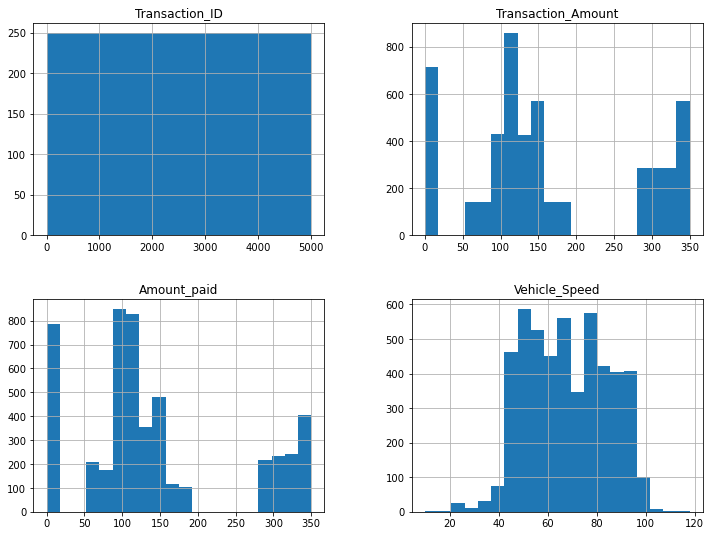

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical columns
data.hist(bins = 20, figsize=(12,9))
plt.show()


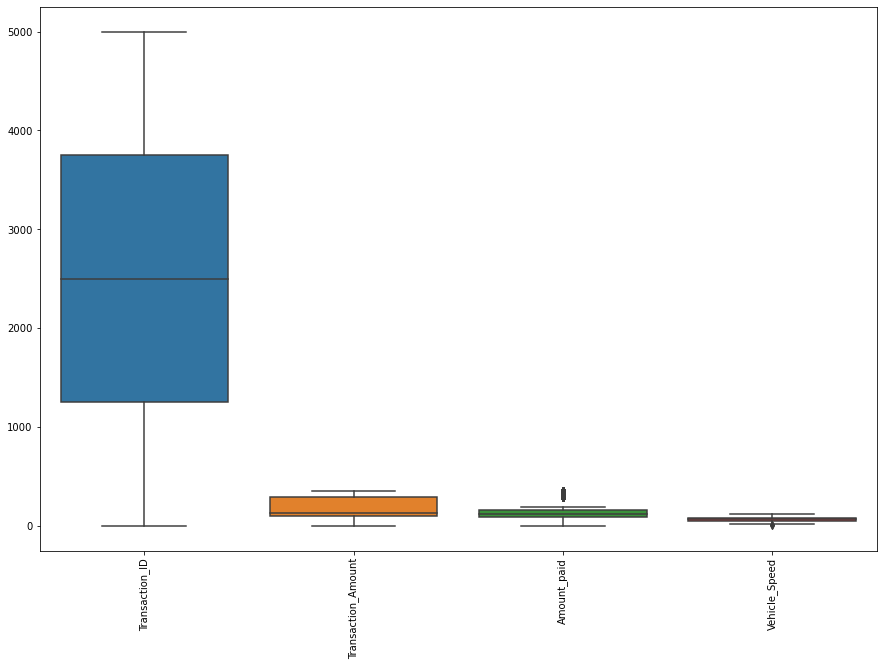

In [ ]:
# boxplot for numerical value
plt.figure(figsize=(15, 10))
sns.boxplot(data = data)
plt.xticks(rotation = 90)
plt.show()

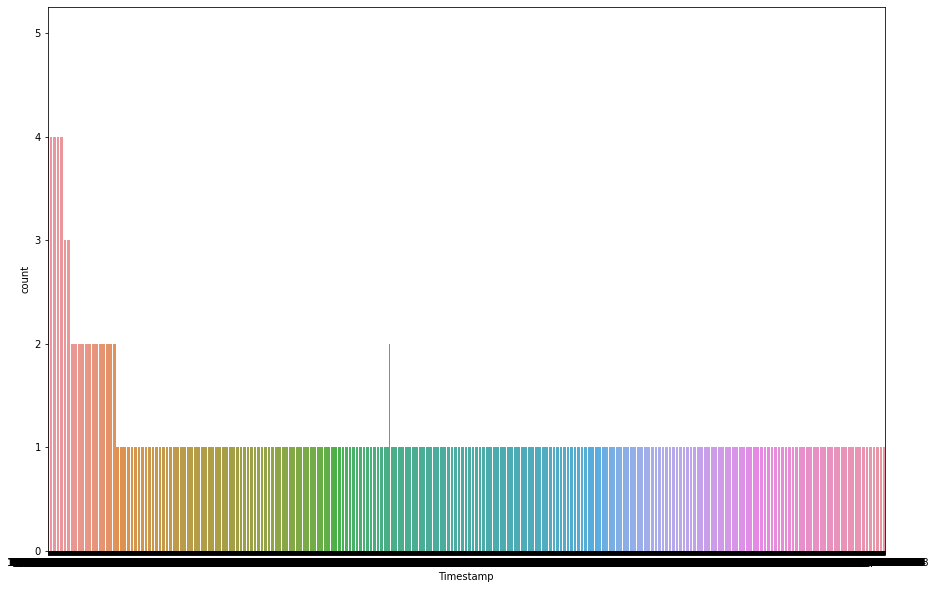

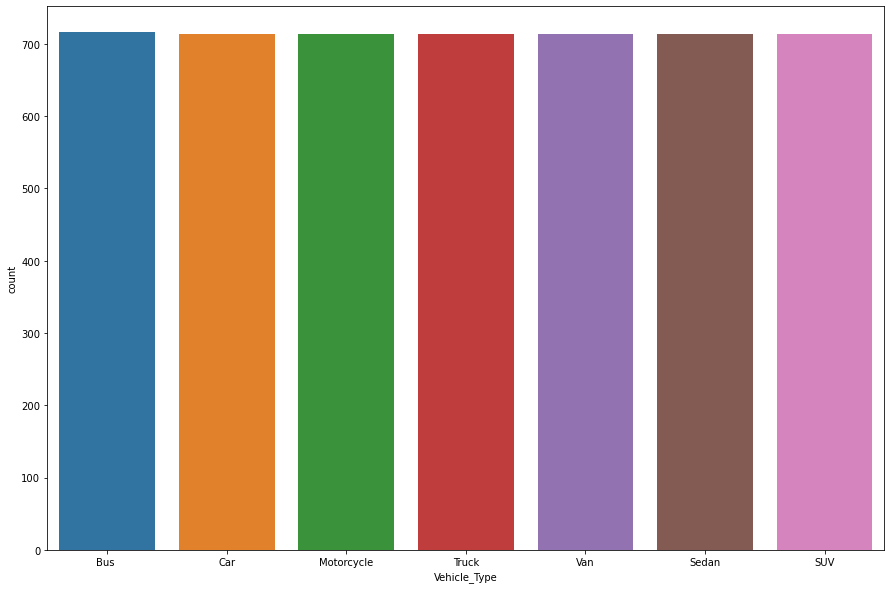

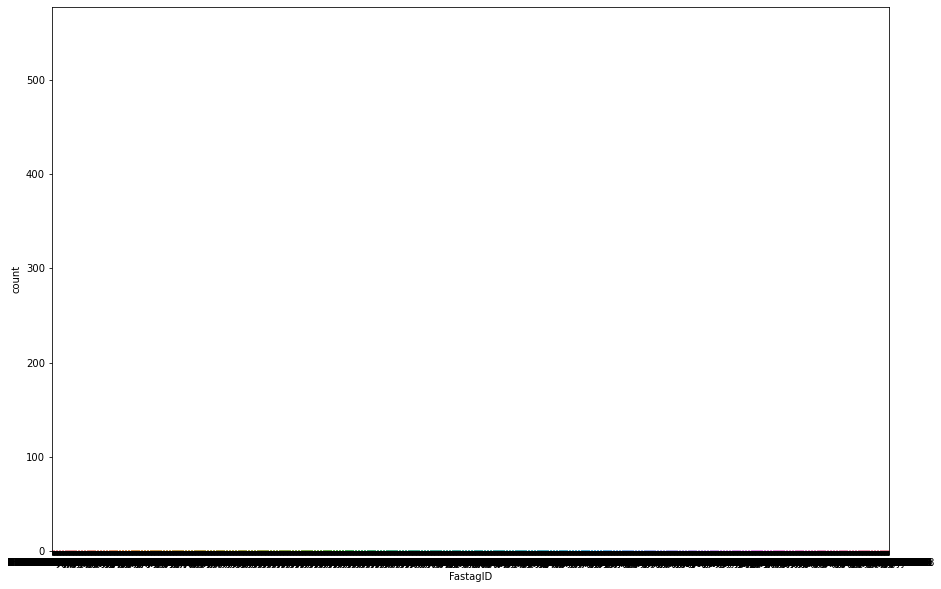

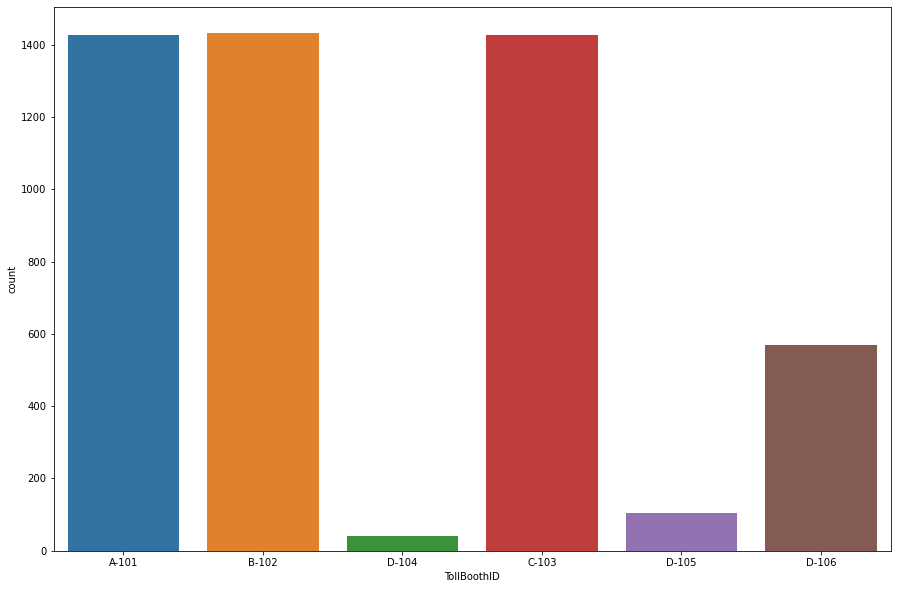

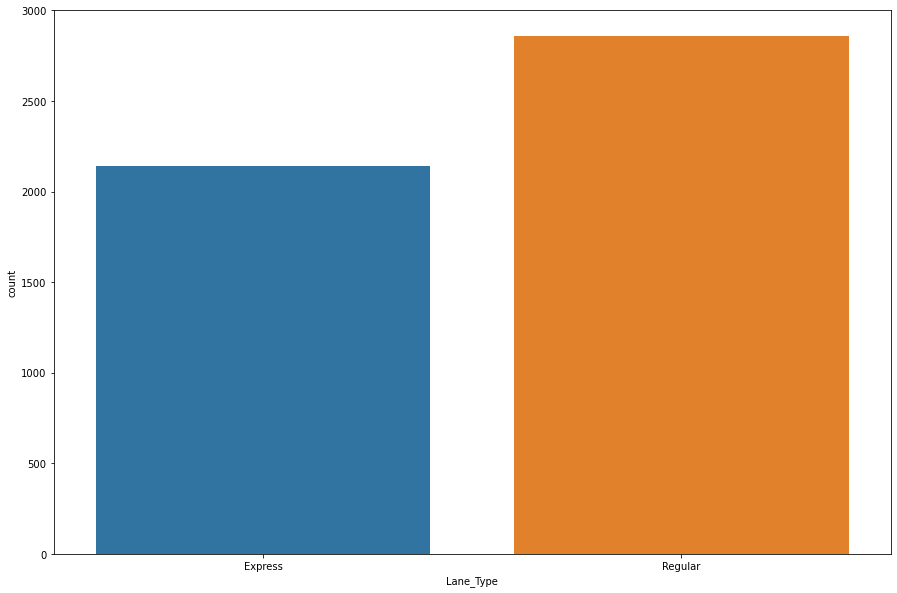

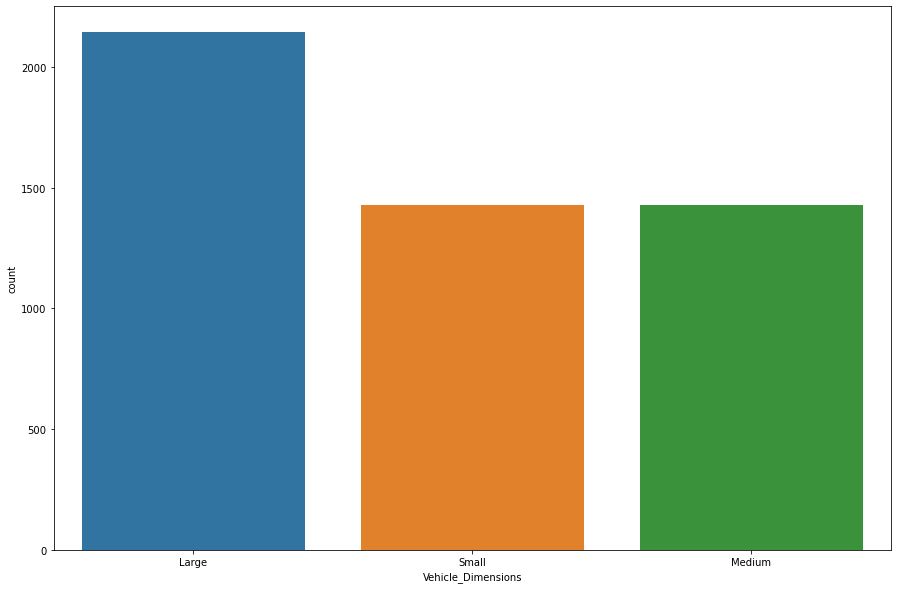

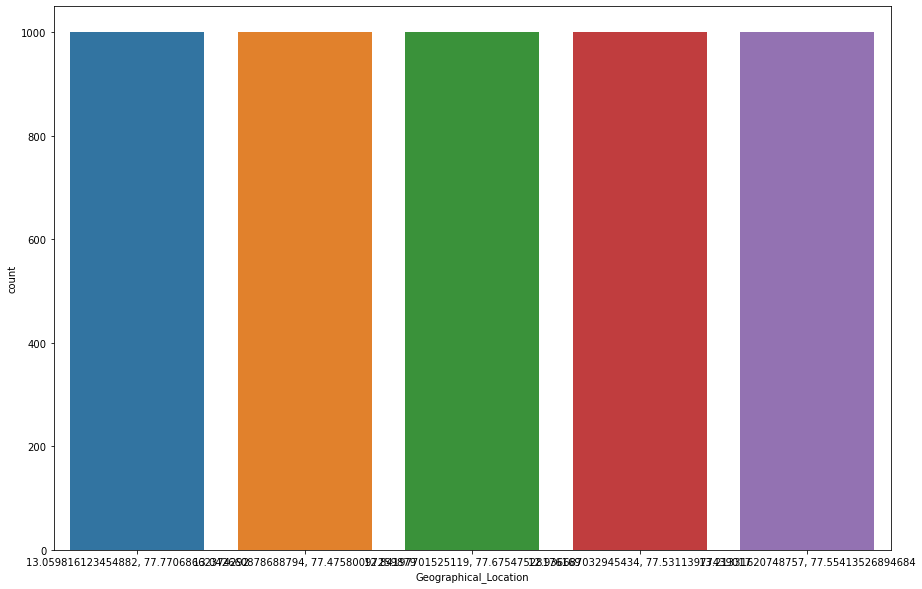

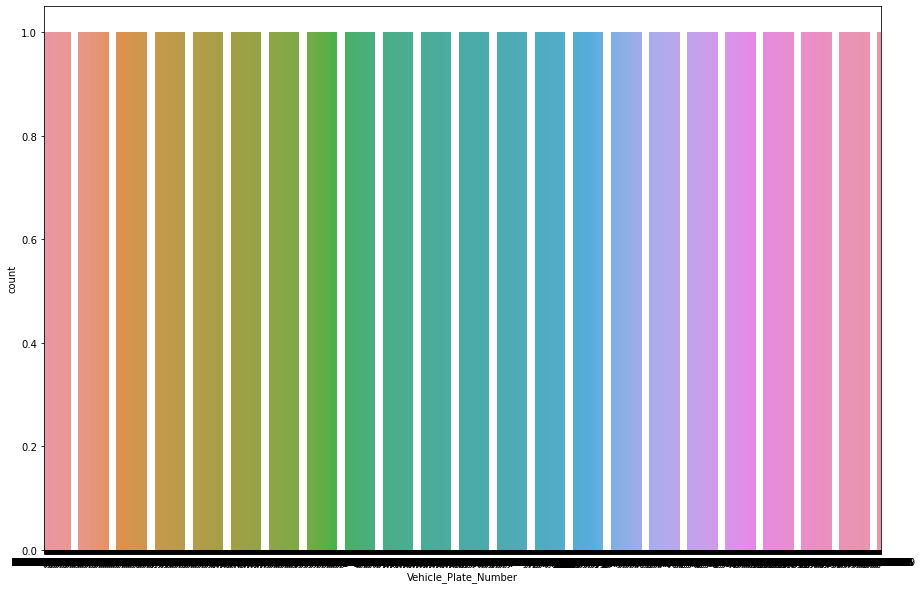

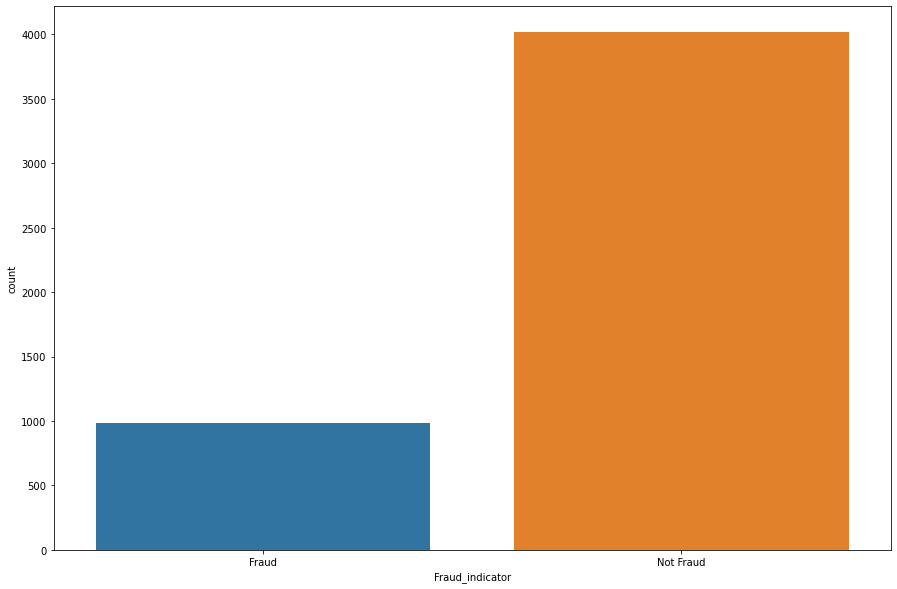

In [ ]:
# Count plots for categorical columns
categorical = ['Timestamp', 'Vehicle_Type', 'FastagID', 'TollBoothID','Lane_Type','Vehicle_Dimensions','Geographical_Location','Vehicle_Plate_Number','Fraud_indicator']

for col in categorical:
        plt.figure(figsize = (15, 10))
        sns.countplot(x = col, data = data)
        plt.show()

# EDA Practical

Exploratory Data Analysis (EDA) include feature engineering to create new predictive variables, and applying dimensionality reduction techniques (e.g., PCA (Principal Component Analysis), t-SNE (t-Distributed Stochastic Neighbor Embedding)) to simplify the dataset while preserving essential information.

Univariate statistics summarize only one variable at a time. Bivariate statistics compare two variables. Multivariate statistics compare more than two variables.
Univariate analysis focuses on understanding individual variables. - Bivariate analysis examines relationships between two variables. - Multivariate analysis deals with the interactions and relationships among three or more variables

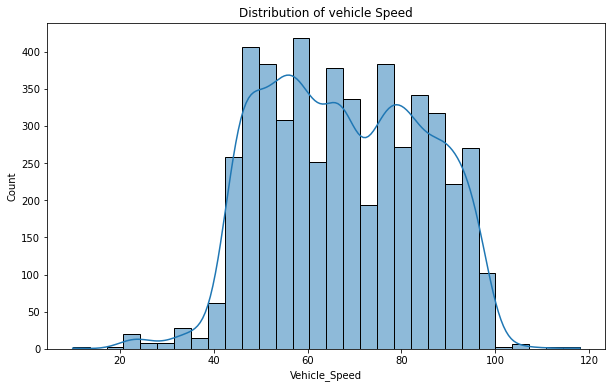

In [ ]:
# Distribute of Vehicle Speed
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Vehicle_Speed', bins=30 , kde=True)
plt.title('Distribution of vehicle Speed')
plt.show()

<Figure size 864x720 with 0 Axes>

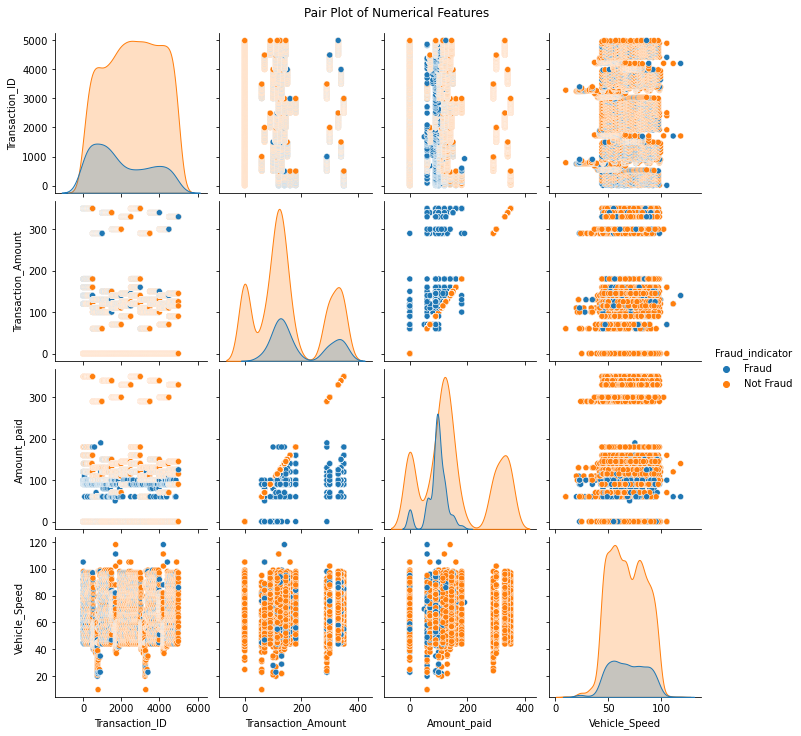

In [ ]:
# Pair plot for numerical features
plt.figure(figsize=(12,10))
sns.pairplot(data, diag_kind='kde',hue='Fraud_indicator')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

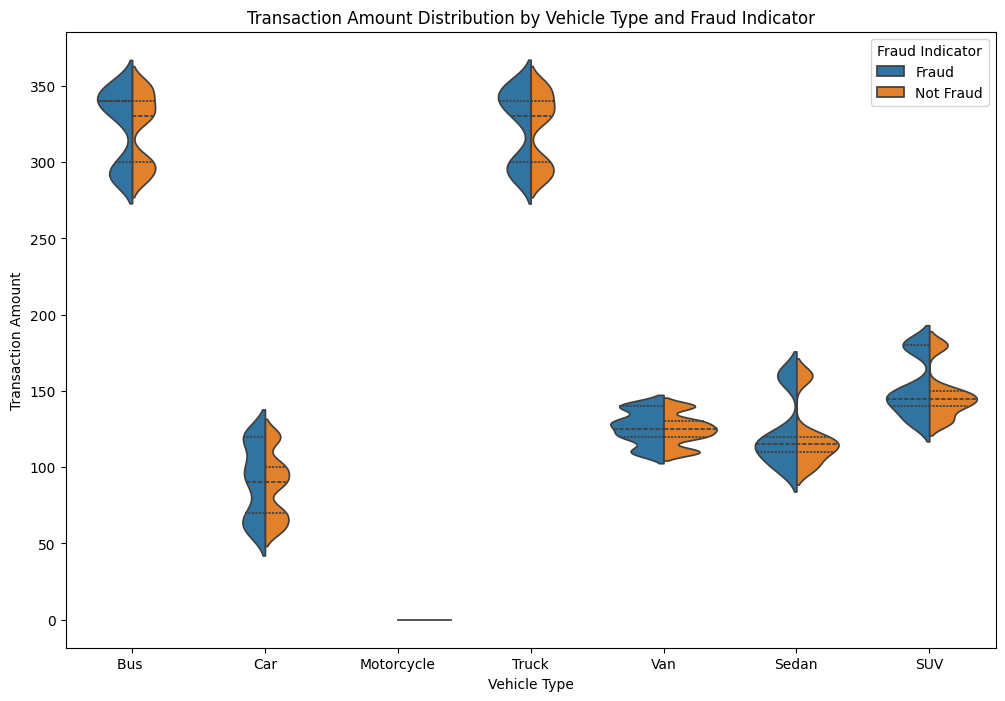

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a violin plot for Transaction_Amount by Vehicle_Type and Fraud_indicator
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, x='Vehicle_Type', y='Transaction_Amount', hue='Fraud_indicator', split=True, inner='quartile')
plt.title('Transaction Amount Distribution by Vehicle Type and Fraud Indicator')
plt.xlabel('Vehicle Type')
plt.ylabel('Transaction Amount')
plt.legend(title='Fraud Indicator')

# Display the plot
plt.show()


<ipython-input-22-323ce493c836>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Vehicle_Type', y='Transaction_Amount', palette='Set2')


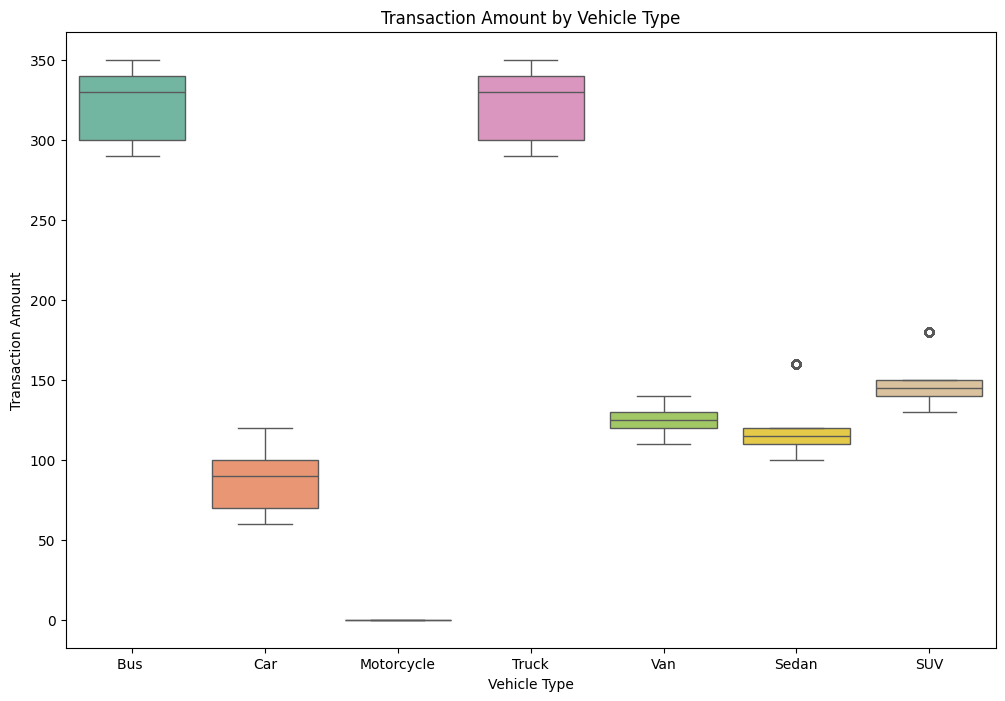

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Vehicle_Type', y='Transaction_Amount', palette='Set2')
plt.title('Transaction Amount by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Transaction Amount')
plt.show()


### Violin plot insights
#### Fraud vs. Non-Fraud Differences:

For cars and smaller vehicles, the fraudulent transaction amounts don't deviate dramatically from non-fraudulent ones, suggesting that while fraud occurs, it may not significantly alter the transaction amount as it does with larger vehicles.
Outliers and Extremes:

#### Outliers and Extremes

The presence of outliers, particularly in the fraudulent categories for buses and trucks, suggests extreme cases of fraud where the transaction amounts are unusually high.

In [16]:
# Question: Is there a correlation between vehicle speed
# and the likelihood of a transaction being fraudulent?

import pandas as pd

# Assuming 'data' is your DataFrame
# Encoding 'Fraud_indicator' where 'Fraud' is 1 and 'Not Fraud' is 0
data['Fraud_Indicator_Binary'] = data['Fraud_indicator'].apply(lambda x: 1 if x == 'Fraud' else 0)

# Calculating the correlation coefficient
correlation_result = data['Vehicle_Speed'].corr(data['Fraud_Indicator_Binary'])

print('Correlation coefficient:', correlation_result)


Correlation coefficient: 0.014593552108078113


In [17]:
# Question: Is there a correlation between vehicle speed and the likelihood of a transaction being fraudulent?

correlation = data[['Vehicle_Speed', 'Transaction_Amount']].corr()

print(correlation)

                    Vehicle_Speed  Transaction_Amount
Vehicle_Speed            1.000000            0.053229
Transaction_Amount       0.053229            1.000000


In [21]:
# How do vehicle dimensions (Small, Medium, Large) impact the transaction amount and the probability of fraud? Use ANOVA to test differences.

In [20]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# Functions in Python
Definition: A function is a block of organized, reusable code that is used to perform a single,
related action. Functions provide better modularity for your application and a high degree of
code reusability.
**Key Concepts**
1. Function Definition and Calling:
Define a function using the def keyword.
Call a function using its name followed by parentheses.
2. Parameters and Arguments:
Parameters: Variables listed inside the parentheses in the function definition.
Arguments: Values passed to the function when it is called.
3. Return Statement:
The return statement is used to exit a function and go back to the place from where it
was called.
4. Default Arguments:
Function arguments can have default values.
5. Variable Scope:
Variables defined inside a function are local to that function.


In [ ]:
# Basic Function
def greet(name):
 """
 Function to greet a person.
 """
 return f"Hello, {name}!"
# Calling the function
print(greet("Alice"))

Hello, Alice!


In [ ]:
# Function with Default Arguments
def greet(name="World"):
 """
 Function to greet a person with a default name.
 """
 return f"Hello, {name}!"
# Calling the function
print(greet())
print(greet("Alice"))

Hello, World!
Hello, Alice!


In [ ]:
# Function Returning Multiple Values
def arithmetic_operations(a, b):
 """
 Function to perform arithmetic operations.
 """
 addition = a + b
 subtraction = a - b
 multiplication = a * b
 division = a / b if b != 0 else None
 return addition, subtraction, multiplication, division
# Calling the function
add, sub, mul, div = arithmetic_operations(10, 5)
print(f"Add: {add}, Subtract: {sub}, Multiply: {mul}, Divide: {div}")

Add: 15, Subtract: 5, Multiply: 50, Divide: 2.0


In [ ]:
# Reading Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
def read_data(file_path):
 """
 Function to read CSV data.
 """
 return pd.read_csv(file_path, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Example usage
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = read_data(url)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
# Model Training
def train_model(X, y): # taking features X and target variable y as input.
 """
 Function to train a logistic regression model and evaluates its accuracy.
 """
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#  divide the data into training (80%) and testing (20%) sets.
 model = LogisticRegression(max_iter=200) # creating model
 model.fit(X_train, y_train) # training model
 return model, X_test, y_test # returns the trained model, along with the testing features (X_test) and testing target (y_test)

# Train the model - Example usage
X = df_clean.drop("species", axis=1) # extracted from df_clean by dropping the 'species' column
y = df_clean["species"] # The target variable y is set as the 'species' column from df_clean
model, X_test, y_test = train_model(X, y) # The train_model function is called with X and y, and the returned values are stored in model, X_test, and y_test
print(f"Model accuracy: {model.score(X_test, y_test)}") # The accuracy of the model is calculated using model.score(X_test, y_test) and printed

Model accuracy: 1.0


The evaluation results you've provided indicate that the model performed exceptionally well on the test dataset. Here’s what each metric tells you about the model's accuracy:

Accuracy (1.0): This metric shows that the model correctly predicted 100% of the test data instances. In other words, every prediction made by the model matched the actual label.

Precision (1.0): Precision measures the accuracy of the positive predictions. A precision of 1.0 means that every instance predicted as positive by the model was indeed positive, with no false positives.

Recall (1.0): Recall (also known as sensitivity) measures the ability of the model to find all the relevant cases within a dataset. A recall of 1.0 indicates that the model identified every actual positive instance in the test data, with no false negatives.

These results suggest that the model has achieved perfect performance metrics on the test set. However, while these metrics appear excellent, it's essential to consider a few points:

Overfitting: Perfect scores can sometimes indicate that the model may be overfitting the training data. If the model has memorized the training data rather than learning to generalize from it, it might perform less effectively on new, unseen data.

# Exercise
A. Basic Function Creation:
1. Write a function square that takes a number and returns its square.
2. Write a function cube that takes a number and returns its cube.

B. Data Manipulation Functions:
3. Write a function filter_above_threshold that takes a DataFrame and a threshold, and
returns a DataFrame with rows where a specified column's value is above the
threshold.
4. Write a function normalize_column that takes a DataFrame and a column name, and
returns the DataFrame with the specified column normalized (values between 0 and 1).

C. Model Evaluation:
5. Write a function evaluate_model that takes a model, test features, and test labels, and
returns the model's performance metrics (e.g., accuracy, precision, recall).

In [ ]:
# 1. write a function square that takes a number and returnes its square
def square(number):
    return number ** 2

# Example usage:
result = square(4)
print(result)

16


In [ ]:
# 2. Write a function cube that takes a number and returns its cube
def cube(number):
    return number ** 3

# Example usage:
result = cube(3)
print(result)

27


In [ ]:
# 3. Write a function filter_above_threshold that takes a DataFrame and a threshold,
# and returns a DataFrame with rows where a specified column's value is above the threshold
import pandas as pd

def filter_above_threshold(df, column, threshold):
    return df[df[column] > threshold]

# Example usage
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50]
}
df = pd.DataFrame(data)
filtered_df = filter_above_threshold(df, 'B', 25)
print(filtered_df)

   A   B
2  3  30
3  4  40
4  5  50


In [ ]:
# 4. Write a function normalize_column that takes a DataFrame and a column name,
# and returns the DataFrame with the specified column normalized (values between 0 and 1).
import pandas as pd

def normalize_column(df, column):
    min_val = df[column].min()
    max_val = df[column].max()
    df[column] = (df[column] - min_val) / (max_val - min_val) # transforms all the values to fall between 0 and 1
    return df

# Example usage
data = {
    'A': [10, 20, 30, 40, 50],
    'B': [15, 25, 35, 45, 55]
}
df = pd.DataFrame(data)
normalized_df = normalize_column(df.copy(), 'A')
"""
df.copy() creates a deep copy of the DataFrame.
This means that it creates a new DataFrame that is completely independent of the original,
including a separate copy of the data and the indices.
Changes made to the new DataFrame do not affect the original DataFrame.
"""
print("Normalized DataFrame:\n", normalized_df)

Normalized DataFrame:
       A   B
0  0.00  15
1  0.25  25
2  0.50  35
3  0.75  45
4  1.00  55


In [ ]:
# 5. Write a function evaluate_model that takes a model, test features, and test labels,
# and returns the model's performance metrics (e.g., accuracy, precision, recall)
from sklearn.metrics import accuracy_score, precision_score, recall_score
"""
Here, we import three functions from sklearn.metrics:

accuracy_score computes the accuracy, the ratio of correctly predicted observations to the total observations.
precision_score computes the precision, the ratio of correctly predicted positive observations to the total predicted positives.
recall_score measures the recall, the ratio of correctly predicted positive observations to all actual positives.
"""
def evaluate_model(model, test_features, test_labels):
    predictions = model.predict(test_features) # generates predictions based on the test features.
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions, average='macro')
    # The average='macro' parameter calculates metrics independently for each class and then takes the average, treating all classes equally.
    recall = recall_score(test_labels, predictions, average='macro')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall
    }

# Example usage
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load data
data = load_iris()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #  random_state controls the randomness to make your experiments reproducible.

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
metrics = evaluate_model(model, X_test, y_test)
print(metrics)


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0}


# Sample Questions
D. Theoretical Questions:
6. What is the difference between a parameter and an argument?
7. Explain the concept of variable scope with examples.

E. Coding Questions:
8. Implement a function that calculates the factorial of a number using recursion.
9. Write a function that takes a list of numbers and returns a dictionary with the mean,
median, and mode of the list.

F. Data Science Specific:
10. Write a function to compute the Root Mean Squared Error (RMSE) for a set of
predictions and actual values.
11. Implement a function to split a DataFrame into training and testing sets with a specified

**6. What is the difference between a parameter and an argument?**

Answer:

A parameter is a variable in the declaration of a function or method. It acts as a placeholder that holds the place for the data that will be passed to the function.
An argument is the actual data that is passed to the function when calling it. Arguments are the values assigned to the parameters when the function is executed.


**7. Explain the concept of variable scope with examples.**

Answer:

Global Scope: A variable declared in the main body of a script or outside any function is in the global scope. It is accessible from anywhere in the script.
Local Scope: A variable declared inside a function is in the local scope of that function. It is accessible only within that function and not outside it.


In [ ]:
# Example 1: Global Scope
x = 10  # Global variable

def print_x():
    print(x)  # Accessing the global variable x

print_x()  # Outputs 10
print(x)   # Outputs 10

10
10


In [ ]:
# Example 2: Local Scope
def set_y():
    y = 20  # Local variable
    print(y)  # Accessible inside the function

set_y()  # Outputs 20
# print(y)  # This would raise an error because y is not accessible outside the function


20


**8. Implement a function that calculates the factorial of a number using recursion.**

In [ ]:
# Answer
def factorial(n):
    # Base case: the factorial of 0 or 1 is 1
    if n == 0 or n == 1:
        return 1
    # Recursive case: multiply n by the factorial of n-1
    else:
        return n * factorial(n - 1)

# Example usage
print(factorial(5))  # Output will be 120


**9. Write a function that takes a list of numbers and returns a dictionary with the mean, median, and mode of the list.**

In [ ]:
# Answer
import statistics

def calculate_stats(numbers):
    if not numbers:  # Check if the list is empty
        return {"mean": None, "median": None, "mode": None}

    mean = statistics.mean(numbers)
    median = statistics.median(numbers)
    mode = statistics.mode(numbers)
    """
    The statistics.mode() function throws a StatisticsError
    if no number in the list is repeated (i.e., there is no mode).
    This code assumes there is at least one repeated number for the mode.
    """
    return {
        "mean": mean,
        "median": median,
        "mode": mode
    }

# Example usage
data = [1, 2, 3, 4, 4, 5, 5, 5]
stats = calculate_stats(data)
print(stats)  # Output will be {'mean': 3.625, 'median': 4.0, 'mode': 5}


{'mean': 3.625, 'median': 4.0, 'mode': 5}


**10. Write a function to compute the Root Mean Squared Error (RMSE) for a set of predictions and actual values.**

In [ ]:
"""
Mean Squared Error (MSE): It calculates the mean squared error by
first finding the difference between each pair of predicted and actual values,
squaring these differences to make them positive,
and then averaging these squared differences.
"""
#Answer
import numpy as np

def rmse(predictions, actuals):
    # Convert inputs to numpy arrays to ensure correct element-wise operations
    predictions = np.array(predictions)
    actuals = np.array(actuals)

    # Calculate the square of differences, compute the mean, then take the square root
    mse = np.mean((predictions - actuals) ** 2)
    return np.sqrt(mse)

# Example usage
predictions = [2.5, 0.5, 2, 8]
actuals = [3, -0.5, 2, 7]
error = rmse(predictions, actuals)
print("RMSE:", error)


**11. Implement a function to split a DataFrame into training and testing sets with a specified**

In [ ]:
# Answer
import pandas as pd
from sklearn.model_selection import train_test_split

def split_data(df, train_size=0.8): # optional train_size parameter that defaults to 0.8 (80% of the data). This means 80% of the data will be used for training by default.
    """
    Splits a DataFrame into training and testing sets.

    Args:
    df (pd.DataFrame): The DataFrame to split.
    train_size (float): The proportion of the dataset to include in the train split.

    Returns:
    train_df (pd.DataFrame): Training dataset.
    test_df (pd.DataFrame): Testing dataset.
    """
    train_df, test_df = train_test_split(df, train_size=train_size, random_state=42)
    return train_df, test_df

# Example usage:
data = {
    'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'B': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}
df = pd.DataFrame(data)
train_df, test_df = split_data(df, train_size=0.7)
print("Training Data:\n", train_df)
print("Testing Data:\n", test_df)


Training Data:
     A    B
0   1   10
7   8   80
2   3   30
9  10  100
4   5   50
3   4   40
6   7   70
Testing Data:
    A   B
8  9  90
1  2  20
5  6  60


# Real-World Questions on Functions

In [ ]:
# Question 1: Calculate the Monthly Sales Average

""" You are given a dictionary where the keys are product names and the values
are lists of monthly sales figures for each product.
Write a function to calculate the average monthly sales for each product
"""
import numpy as np
# Sample data
sales_data = {
 'Product_A': [150, 200, 250, 300],
 'Product_B': [400, 500, 600, 700],
 'Product_C': [100, 150, 200, 250]
}
def calculate_monthly_averages(sales_data):
 """
 Function to calculate the average monthly sales for each product.
 """
 averages = {}
 for product, sales in sales_data.items():
  averages[product] = np.mean(sales)
 return averages
# Example usage
averages = calculate_monthly_averages(sales_data)
print(averages)

{'Product_A': 225.0, 'Product_B': 550.0, 'Product_C': 175.0}


In [ ]:
# Question 3: Count Unique Values in a DataFrame Column
""" Given a dataframe write a function to count the number of unique values in a specific column
"""
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Alice'],
    'Age': [25,30,35,40, 25]
}

# Create DataFrame
df = pd.DataFrame(data)

# Function to count unique values in a specific column
def count_unique_values(df, column_name):
    return df[column_name].nunique()

# Example usage
unique_names = count_unique_values(df, 'Name')
print(f"Number of unique names: {unique_names}")

unique_ages = count_unique_values(df, 'Age')
print(f"Number of unique ages: {unique_ages}")

Number of unique names: 4
Number of unique ages: 4


In [ ]:
# Question 3: Normalize Data in a DataFrame
"""Write the function to normalize the data in the data frame
that each value in the column is scaled to a range of 0 to 1"""
import pandas as pd
# Sample data
data = {
 'A': [1, 2, 3, 4, 5],
 'B': [10, 20, 30, 40, 50]
}
df = pd.DataFrame(data)
def normalize_column(df):
 """
 Function to normalize the data in the DataFrame.
 """
 result = df.copy()
 for column in result.columns:
  max_value = result[column].max()
  min_value = result[column].min()
  result[column] = (result[column] - min_value) / (max_value - min_value)
 return result
# Example usage
normalized_df = normalize_column(df)
print(normalized_df)

      A     B
0  0.00  0.00
1  0.25  0.25
2  0.50  0.50
3  0.75  0.75
4  1.00  1.00


In [ ]:
# Question 4: Find Missing Values
""" Given a DataFrame, write a function to find and return the number of
missing values in each column."""
import pandas as pd
# Sample data
data = {
 'A': [1, 2, None, 4, 5],
 'B': [None, 2, 3, 4, None],
 'C': [1, None, 3, None, 5]
}
df = pd.DataFrame(data)
def find_missing_values(df):
 """
 Function to find the number of missing values in each column.
 """
 return df.isnull().sum()
# Example usage
missing_values = find_missing_values(df)
print(missing_values)


A    1
B    2
C    2
dtype: int64


In [ ]:
# Question 5: Selecting Specific Rows and Columns
""" Given a DataFrame, how do you select rows where a specific column's
value is greater than a given threshold and only select certain columns?"""
import pandas as pd
# Sample data
data = {
 'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
 'Age': [24, 27, 22, 32, 29],
 'Score': [85, 95, 70, 60, 80]
}
df = pd.DataFrame(data)
def select_rows_and_columns(df, threshold, columns):
 """
 Function to select rows where 'Age' is greater than the threshold
 and select specified columns.
 """
 filtered_df = df[df['Age'] > threshold]
 return filtered_df[columns]
# Example usage
result = select_rows_and_columns(df, 25, ['Name', 'Score'])
print(result)

    Name  Score
1    Bob     95
3  David     60
4    Eve     80


In [ ]:
# Question 6: Grouping and Aggregation
"""How do you group a DataFrame by a column and compute the sum of another
column?"""
import pandas as pd
# Sample data
data = {
 'Department': ['HR', 'IT', 'HR', 'IT', 'Finance'],
 'Salary': [50000, 60000, 45000, 65000, 70000]
}
df = pd.DataFrame(data)
def group_and_aggregate(df):
 """
 Function to group by 'Department' and compute the sum of 'Salary'.
 """
 return df.groupby('Department')['Salary'].sum().reset_index()
# Example usage
result = group_and_aggregate(df)
print(result)

  Department  Salary
0    Finance   70000
1         HR   95000
2         IT  125000


#Pandas Questions
Question 1: Filter DataFrame by Multiple Conditions: Given a DataFrame with columns
Name, Age, and Score, write a function to filter rows where Age is greater than 25 and
Score is greater than 80.

Question 2: Pivot Table Creation: Given a DataFrame with columns Department,
Employee, and Salary, write a function to create a pivot table that shows the average
salary for each department.

Question 3: Merge DataFrames: Given two DataFrames, df1 and df2, which both have
a common column ID, write a function to merge these DataFrames on the ID column
and return the merged DataFrame.

Question 4: Handle Missing Values: Write a function to fill missing values in a
DataFrame. If the column is numerical, fill with the mean of the column. If the column is
categorical, fill with the mode of the column.

Question 5: Calculate Rolling Mean: Given a DataFrame with a time series column
Value, write a function to calculate the rolling mean with a window size of 3 and add it
as a new column to the DataFrame.
# Lists Questions
Question 1: Chunk a List: Write a function to split a list into chunks of a given size. For
example, given the list [1, 2, 3, 4, 5, 6, 7, 8, 9] and chunk size 3, the function should
return [[1, 2, 3], [4, 5, 6], [7, 8, 9]].

Question 2: List Intersection: Write a function to find the intersection of two lists,
returning a list of elements that are present in both lists.

Question 3: Rotate List: Write a function to rotate a list n positions to the left. For
example, rotating [1, 2, 3, 4, 5] by 2 positions should result in [3, 4, 5, 1, 2].

Question 4: Find Duplicates: Write a function to find all duplicate elements in a list. The
function should return a list of duplicates.

Question 5: Cumulative Sum: Write a function to compute the cumulative sum of a list.
For example, given the list [1, 2, 3, 4], the function should return [1, 3, 6, 10].


In [1]:
"""
Question 1: Filter DataFrame by Multiple Conditions:
Given a DataFrame with columns Name, Age, and Score,
write a function to filter rows where Age is greater than 25 and Score is greater than 80.
"""
import pandas as pd

def filter_rows(df):
    """
    Filters rows based on two conditions:
    - Age must be greater than 25
    - Score must be greater than 80

    Args:
    df (pd.DataFrame): DataFrame containing the columns 'Name', 'Age', and 'Score'

    Returns:
    pd.DataFrame: A DataFrame containing only rows that meet the conditions
    """
    filtered_df = df[(df['Age'] > 25) & (df['Score'] > 80)]
    return filtered_df

# Example usage:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [30, 22, 35, 28, 20],
    'Score': [88, 70, 90, 85, 65]
}
df = pd.DataFrame(data)
result_df = filter_rows(df)
print(result_df)


      Name  Age  Score
0    Alice   30     88
2  Charlie   35     90
3    David   28     85


In [2]:
"""
Question 2: Pivot Table Creation: Given a DataFrame with columns Department, Employee,
and Salary, write a function to create a pivot table that shows the average salary for each department.
"""
import pandas as pd

def create_pivot_table(df):
    """
    Creates a pivot table showing the average salary for each department.

    Args:
    df (pd.DataFrame): DataFrame containing the columns 'Department', 'Employee', and 'Salary'.

    Returns:
    pd.DataFrame: A pivot table with the average salary for each department.
    """
    pivot_table = df.pivot_table(values='Salary', index='Department', aggfunc='mean')
    return pivot_table

# Example usage:
data = {
    'Department': ['Finance', 'Marketing', 'Finance', 'HR', 'Marketing', 'HR'],
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank'],
    'Salary': [50000, 60000, 52000, 40000, 65000, 42000]
}
df = pd.DataFrame(data)

# Creating the pivot table
average_salary_pivot = create_pivot_table(df)
print(average_salary_pivot)


            Salary
Department        
Finance      51000
HR           41000
Marketing    62500


In [3]:
"""
Question 3: Merge DataFrames: Given two DataFrames, df1 and df2,
which both have a common column ID,
write a function to merge these DataFrames on the ID column and return the merged DataFrame.
"""
import pandas as pd

def merge_dataframes(df1, df2):
    """
    Merges two DataFrames on the 'ID' column.

    Args:
    df1 (pd.DataFrame): The first DataFrame with an 'ID' column.
    df2 (pd.DataFrame): The second DataFrame with an 'ID' column.

    Returns:
    pd.DataFrame: The merged DataFrame based on the 'ID' column.
    """
    merged_df = pd.merge(df1, df2, on='ID')
    return merged_df

# Example usage:
data1 = {
    'ID': [1, 2, 3, 4],
    'Product': ['Apple', 'Banana', 'Cherry', 'Date']
}
df1 = pd.DataFrame(data1)

data2 = {
    'ID': [3, 4, 5, 6],
    'Price': [95, 100, 75, 50]
}
df2 = pd.DataFrame(data2)

# Merging the DataFrames
result_df = merge_dataframes(df1, df2)
print(result_df)


   ID Product  Price
0   3  Cherry     95
1   4    Date    100


In [ ]:
"""
Question 4: Handle Missing Values: Write a function to fill missing values in a DataFrame.
If the column is numerical, fill with the mean of the column.
If the column is categorical, fill with the mode of the column.
"""
import pandas as pd
from scipy.stats import mode

def fill_missing_values(df):
    """
    Fills missing values in a DataFrame:
    - For numerical columns, fills with the mean.
    - For categorical columns, fills with the mode.

    Args:
    df (pd.DataFrame): DataFrame with missing values.

    Returns:
    pd.DataFrame: DataFrame with missing values filled.
    """
    for column in df.columns:
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            # Fill missing values with mean for numerical columns
            df[column].fillna(df[column].mean(), inplace=True)
        else:
            # Fill missing values with mode for categorical columns
            most_common = df[column].mode()[0]
            df[column].fillna(most_common, inplace=True)
    return df

# Example usage:
data = {
    'A': [1, 2, None, 4],
    'B': ['red', None, 'blue', 'blue'],
    'C': [None, 2, 3, 4]
}
df = pd.DataFrame(data)

# Filling missing values
result_df = fill_missing_values(df)
print(result_df)


In [ ]:
"""
Question 5: Calculate Rolling Mean: Given a DataFrame with a time series column Value,
write a function to calculate the rolling mean with a window
size of 3 and add it as a new column to the DataFrame.
"""
import pandas as pd

def add_rolling_mean(df):
    """
    Adds a rolling mean column to a DataFrame with a 'Value' column.

    Args:
    df (pd.DataFrame): DataFrame containing the 'Value' column.

    Returns:
    pd.DataFrame: DataFrame with an additional column 'Rolling_Mean' that contains the rolling mean of 'Value'.
    """
    # Calculate rolling mean with a window of 3
    df['Rolling_Mean'] = df['Value'].rolling(window=3).mean()
    return df

# Example usage:
data = {
    'Date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05'],
    'Value': [10, 20, 30, 40, 50]
}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])  # Converting 'Date' to datetime format if necessary
df.set_index('Date', inplace=True)  # Setting 'Date' as index if dealing with time series

# Adding rolling mean to the DataFrame
result_df = add_rolling_mean(df)
print(result_df)


#List questions
Question 1: Chunk a List: Write a function to split a list into chunks of a given size. For example, given the list [1, 2, 3, 4, 5, 6, 7, 8, 9] and chunk size 3, the function should return [[1, 2, 3], [4, 5, 6], [7, 8, 9]].

Question 2: List Intersection: Write a function to find the intersection of two lists, returning a list of elements that are present in both lists.

Question 3: Rotate List: Write a function to rotate a list n positions to the left. For example, rotating [1, 2, 3, 4, 5] by 2 positions should result in [3, 4, 5, 1, 2].

Question 4: Find Duplicates: Write a function to find all duplicate elements in a list. The function should return a list of duplicates.

Question 5: Cumulative Sum: Write a function to compute the cumulative sum of a list. For example, given the list [1, 2, 3, 4], the function should return [1, 3, 6, 10].

In [6]:
"""
Question 1: Chunk a List: Write a function to split a list into chunks of a given size.
For example, given the list [1, 2, 3, 4, 5, 6, 7, 8, 9] and chunk size 3,
the function should return [[1, 2, 3], [4, 5, 6], [7, 8, 9]].
"""
def chunk_list(input_list, chunk_size):
    """
    Splits a list into chunks of a specified size.

    Args:
    input_list (list): The list to be chunked.
    chunk_size (int): The size of each chunk.

    Returns:
    list: A list of chunks, where each chunk is a sublist of the input list.
    """
    # Create an empty list to hold the chunks
    chunks = []
    # Loop over the start index of each chunk
    for i in range(0, len(input_list), chunk_size):
        # Append a new chunk to the chunks list
        chunks.append(input_list[i:i + chunk_size])
    return chunks

# Example usage
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
chunk_size = 3
chunked_list = chunk_list(my_list, chunk_size)
print(chunked_list)  # Output: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [7]:
"""
Question 2: List Intersection: Write a function to find the intersection of two lists,
returning a list of elements that are present in both lists.
"""
def list_intersection(list1, list2):
    """
    Finds the intersection of two lists.

    Args:
    list1 (list): The first list.
    list2 (list): The second list.

    Returns:
    list: A list containing elements that are present in both input lists.
    """
    # Convert lists to sets to find intersection
    set1 = set(list1)
    set2 = set(list2)
    # Find intersection of both sets
    intersection = set1.intersection(set2)
    # Convert the set back to a list
    return list(intersection)

# Example usage
list1 = [1, 2, 3, 4, 5]
list2 = [4, 5, 6, 7, 8]
result = list_intersection(list1, list2)
print(result)  # Output: [4, 5]

[4, 5]


In [8]:
"""
Question 3: Rotate List: Write a function to rotate a list n positions to the left.
For example, rotating [1, 2, 3, 4, 5] by 2 positions should result in [3, 4, 5, 1, 2].
"""
def rotate_list(input_list, n):
    """
    Rotates a list n positions to the left.

    Args:
    input_list (list): The list to rotate.
    n (int): The number of positions to rotate the list.

    Returns:
    list: A new list rotated n positions to the left.
    """
    n = n % len(input_list)  # Ensure n is within the list's bounds
    return input_list[n:] + input_list[:n]

# Example usage
original_list = [1, 2, 3, 4, 5]
n_positions = 2
rotated_list = rotate_list(original_list, n_positions)
print(rotated_list)  # Output: [3, 4, 5, 1, 2]


[3, 4, 5, 1, 2]


In [9]:
"""
Question 4: Find Duplicates: Write a function to find all duplicate elements in a list.
The function should return a list of duplicates.
"""
def find_duplicates(input_list):
    """
    Finds all duplicate elements in a list.

    Args:
    input_list (list): The list to search for duplicates.

    Returns:
    list: A list containing all duplicate elements.
    """
    # Dictionary to count occurrences of each element
    count_dict = {}
    for item in input_list:
        if item in count_dict:
            count_dict[item] += 1
        else:
            count_dict[item] = 1

    # List to hold duplicates
    duplicates = [item for item, count in count_dict.items() if count > 1]
    return duplicates

# Example usage
original_list = [1, 2, 3, 4, 5, 1, 2, 6, 7, 8, 2]
duplicates = find_duplicates(original_list)
print(duplicates)  # Output: [1, 2]


[1, 2]


In [10]:
"""
Question 5: Cumulative Sum: Write a function to compute the cumulative sum of a list.
For example, given the list [1, 2, 3, 4], the function should return [1, 3, 6, 10].
"""
def cumulative_sum(input_list):
    """
    Computes the cumulative sum of a list.

    Args:
    input_list (list): The list to compute the cumulative sum for.

    Returns:
    list: A list containing the cumulative sums.
    """
    cumulative = []
    current_sum = 0
    for number in input_list:
        current_sum += number
        cumulative.append(current_sum)
    return cumulative

# Example usage
original_list = [1, 2, 3, 4]
cumulative_list = cumulative_sum(original_list)
print(cumulative_list)  # Output: [1, 3, 6, 10]

[1, 3, 6, 10]
